# ПРОЕКТ: МАСТЕРСКАЯ ДАННЫХ ОТ ЯНДЕКС ПРАКТИКУМА (анализ такси г. Чикаго, США)

*Мастерская данных - это не просто стандартный спринт в рамках курса. Главное отличие от обычных проектов Яндекс Практикума - эти проекты не повторяются. Студентам одной когорты практикум даёт реальные данные компании заказчика, ставит перед студентами реальную задачу и студент полностью её выполняет самостоятельно. Так как проекты не повторяются (на мастерской), то и сам проект - не будет похож на тысячи других, более ранних, выполненных студентами ранних когорт. Здесь - только то, чему научился студент самостоятельно. Все размышления и заключения так же уникальны. По сути - это полноценный **PET** -проект*

**Задачи и общее описание проекта:**
1. Найти аномалии в данных, принять решение о их сохранении или отбрасывании
2. Рассчитать для каждого часа:




> * Количество машин на линии (только по данным начала поездок)
* Количество поездок
* Среднюю длительность поездки
* Среднюю длинну поездки
* Среднюю тарифную стоимость поездки
* Иные показатели, включая показатели из расчёта на одного водителя, включая общую выручку и выручку водителя (исходя из того, что водитель получает 60% тарифа за поездку и все чаевые)


3. Определить периоды когда водители получают выручку исходя из тарифа ниже среднего меньше чаевых
4. Определить критические периоды дефицита предложения:

> * Рассчитать оптимальное число машин на линии для обеспечения нормального показателя покрытия


5. Визуализировать найденные в п.4 и важные рассчитанные ранее показатели с учётом недельных и суточных циклов

6. Определить периоды, в которые меры стимулирования предложения услуг такси нужны и будут наиболее эффективны

7. В рамках определённых в п.6 периодов оценить:



> * объём недополученной общей выручки из-за низкого предложения
* дефицит количества машин на линии (сколько нужно вывести машин дополнительно, чтобы достичь нормального покрытия)


8. (опционально) Предложить меры стимулирования предложения и оценить их эффективность



9. Подготовить презентацию на 7-10 слайдов с основными результатами проекта.  

# Содержание
<a name='google'></a>

1. [Общая информация о заказе, цели заказа, задачи перед аналитиком](#issue)
2. [Содержание](#google)
3. [Загрузка данных и общая информация о датасете](#download)
4. [Предобработка данных](#pre)
 * [Обработка отсутствующих данных](#NaN)
 * [Преобразование данных](#change)
 * * [Устранение дубликатов](#duplicates)
 * * [Обнаружение и фильтрация выбросов](#v)
5. [Исследовательский анализ данных](#s)
 * [Рассчитать для каждого часа](#hour)
 * * [Количество машин на линии](#cars)
 * * [Количество поездок](#count)
 * * [Среднюю длительность поездки](#long)
 * * [Среднюю длинну поездки](#len)
 * * [Среднюю тарифную стоимость поездки](#tarif)
 * * [Иные показатели, включая показатели из расчёта на одного водителя](#also)
 6. [Периоды, когда водители получают:](#i)
 * * [выручку исходя из тарифа ниже среднего и меньше чаевых](#ii)
 7. [Критические периоды дефицита предложения](#c)
 8. [Периоды, в которые меры стимулирования предложения услуг такси нужны и будут наиболее эффективны](#p)
 * * [объём недополученной общей выручки из-за низкого предложения
дефицит количества машин на линии -сколько нужно вывести машин дополнительно, чтобы достичь нормального покрытия](#m)
 * * [Меры стимулирования предложения](#mer)
 9. [Презентация](#prez)





Ссылка на зипованный архив данных с матерской:
https://drive.google.com/file/d/1e-lXhqJwaqaGjMoAKec0Fz_BdjstuLxD/view?usp=sharing

In [1]:
!gdown --id 1e-lXhqJwaqaGjMoAKec0Fz_BdjstuLxD #загружаем сюда наш архив, его содержание можно посмотреть слева во вкладке содержание (в коллабе)

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e-lXhqJwaqaGjMoAKec0Fz_BdjstuLxD
To: /content/startfiles.zip
100% 46.7M/46.7M [00:00<00:00, 148MB/s]


In [ ]:
!unzip /content/startfiles.zip #разархивируем наш архив

Archive:  /content/startfiles.zip
replace исходники/Estimated_coverage.ftr? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Загрузка данных и общая информация о датасете
<a name='download'></a>

В ячейке снизу будем загружать все нужные библиотеки, ничего кроме них в неё подгружать не следует

In [3]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from plotly import graph_objects as go
import json
import folium
import scipy.stats


# импортируем карту и хороплет
from folium import Map, Choropleth


In [4]:
df = pd.read_feather('исходники/Taxi_data.ftr')
df_cover = pd.read_feather('исходники/Estimated_coverage.ftr')

Загрузили нужные файлы, посмотрим общую информацию о том, что имеем, сколько столбцов, строк, какой объём и какой формат

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826887 entries, 0 to 1826886
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip Start Timestamp        datetime64[ns]
 1   Trip End Timestamp          datetime64[ns]
 2   Trip Seconds                float64       
 3   Trip Miles                  float64       
 4   Pickup Community Area       float64       
 5   Dropoff Community Area      float64       
 6   Fare                        float64       
 7   Tips                        float64       
 8   Tolls                       float64       
 9   Extras                      float64       
 10  Trip Total                  float64       
 11  Payment Type                category      
 12  Company                     category      
 13  Pickup Centroid Latitude    float64       
 14  Pickup Centroid Longitude   float64       
 15  Dropoff Centroid Latitude   float64       
 16  Dropoff Centroid L

Столбцы:

* Trip Start Timestamp: дата и время начала поездки
* Trip End Timestamp: дата и время окончания поездки
* Trip Seconds: продолжительность поездки в секундах
* Trip Miles: расстояние, пройденное во время поездки в милях
* Pickup Community Area: зона, где был подобран клиент
* Dropoff Community Area: зона, где был высажен клиент
* Fare: сумма тарифа, взимаемая за поездку в долларах
* Tips: сумма чаевых за поездку
* Tolls: сумма, уплачиваемая во время поездки (за платные дороги)
* Extras: Дополнительные сборы за поездку
* Trip Total: общая сумма оплаты за поездку
* Payment Type: Тип оплаты поездки
* Company: Компания такси, связанная с поездкой
* Pickup Centroid Latitude, Pickup Centroid Longitude, Dropoff Centroid * Latitude, Dropoff Centroid Longitude: координаты центров кластеров посадки/высадки
* Taxi ID: Уникальный идентификатор такси

In [6]:
df.head(3) #выведем первые три строки таблицы, просто чтобы визуально лучше понять данные в этом сете

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Taxi ID
0,2015-02-06 06:45:00,2015-02-06 07:00:00,540.0,2.8,21.0,15.0,8.85,0.0,0.0,0.0,8.85,No Charge,Top Cab Affiliation,41.938666,-87.711211,41.954028,-87.763399,250
1,2015-02-13 20:30:00,2015-02-13 20:45:00,600.0,2.0,8.0,28.0,8.25,1.0,0.0,0.0,9.25,Credit Card,KOAM Taxi Association,41.890922,-87.618868,41.879067,-87.657005,1915
2,2015-03-11 23:30:00,2015-03-11 23:45:00,540.0,0.1,28.0,8.0,7.65,0.0,0.0,0.0,7.65,Cash,Taxi Affiliation Services,41.879255,-87.642649,41.892508,-87.626215,110


In [7]:
df_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hour Trip Start     1413 non-null   datetime64[ns]
 1   Estimated coverage  1411 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.2 KB


In [8]:
df_cover.head(3)

,Hour Trip Start,Estimated coverage
0,2015-02-01 00:00:00,0.36
1,2015-02-01 01:00:00,0.61
2,2015-02-01 02:00:00,0.74


Столбцы:

- Hour Trip Start: час начала поездки
- Estimated coverage: расчётная величина покрытия машинами.

> Рассчитанная на основании данных доля уникальных клиентов в этот час, которым был предложен вариант поездки по запросу (даже если они не воспользовались услугой).




# Предобработка данных
<a name='pre'></a>

## Обработка отсутствующих данных:
<a name='NaN'></a>

Сначала, проведём разведу боем, посмотрим, какие вообще данные отсутствуют, в каких столбцах.

In [ ]:
df.dropna(how="all") #удалим строки, в которых вообще все столбцы с пропусками

Строк, где были-бы полностью пропущенны все столбцы не имеем, количество строк от первоначального датафрейма не поменялось. Продолжим.

In [ ]:
df.isna().mean().sort_values(ascending=False)

* Более 15% пропусков нет ни в одном столбце. Больше всего потерь наблюдаем в координатах высадки и посадки пассажиров. После идёт общее время поездки в секундах, в расстоянии пройденном за поездку, далее пропуски о тратах пассажиров сверх услуг такси.
* Нет пропусков во времени начала поездки, в компании такси, типе оплаты поездки, времени окончания поездки, в айди такси.
* Так как пропусков во времени начала и конца поездки нет - то по этим двум столбцам можно восстановить пропуски в столбце `Trip Seconds`, если очень захочется. Сейчас мы посмотрим наши данные дальше и решим этот впорос.
* Вообще не вижу особого смысла восстаналивать эти данные, так как доля пропусков не велика для такого числа данных. Был бы смысл, если бы доля была свыше 15%.


---


In [ ]:
df['Trip Seconds'].unique() #посмотрим в каком виде у нас встречаются пропуски

In [ ]:
df['time_nan'] = df['Trip End Timestamp'] - df['Trip Start Timestamp'] #создадим новый столбец, в нем будут все значения поездки в формате timedelta
df['time_nan_seconds'] = df['time_nan'].dt.total_seconds() #переведем полученный столбец в секунды (из временного формата)
display(df['time_nan_seconds'])
display(df['Trip Seconds'])

Мы видим, что время в секундах не совпадает. Значит со столбцом `Time Seconds` уже что-то делали, возможно, округляли время поездки в какую-нибуь сторону. Поэтому, принимаю решение, что заменять пропуски `nan` с помощью вычесленных секунд и метода `fillna` не буду. Оставляем пропуски как есть. 15 % пропусков при таком объёме данных - не критичны.

Приведём столбцы к змеиному шрифту (только сейчас этот момент обнаружила), лучше иметь стандартные правила форматирования названий столбцов.

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.rename(columns={'trip start timestamp': 'trip_start_timestamp', 'trip end timestamp': 'trip_end_timestamp', 'trip seconds':'trip_seconds',
                        'trip miles':'trip_miles', 'pickup community area':'pickup_community_area', 'dropoff community area':'dropoff_community_area',
                        'trip total':'trip_total', 'payment type':'payment_type', 'pickup centroid latitude':'pickup_centroid_latitude',
                         'pickup centroid longitude':'pickup_centroid_longitude', 'dropoff centroid latitude':'dropoff_centroid_latitude',
                        'dropoff centroid longitude':'dropoff_centroid_longitude', 'taxi id':'taxi_id'})

In [ ]:
df.columns

## Преобразование данных
<a name='change'></a>
### Устранение дубликатов
<a name='duplicates'></a>

In [ ]:
print(df.duplicated().sum())

In [ ]:
df[df.duplicated()].head()

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df['taxi_id'].sort_values()

У таксистов есть ошибки в id, не уверена как именно их заменять.

In [ ]:
df.query('taxi_id == -1').shape[0] #посчитаем сколько таких странных id

Всего 14 строк. Просто удалим их.

In [ ]:
df = df[df.taxi_id != -1 ]

### Обнаружение и фильтрация выбросов
<a name='v'></a>

In [ ]:
df.describe().T

На первый взгляд  обнаруживаются выбросы. Попробуем их визуализировать.

In [ ]:
df.hist(figsize=(15, 20));

In [ ]:
#составляем список столбцов, которые нас интересуют:
columns_list = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total']


title_list = ['поездка в секундах', 'поездка в милях','тариф', 'чаевые', 'плата за дорогу платную', 'плата сверх остального', 'общая сумма за всю поездку']


for i in range(len(columns_list)):
    plt.figure(figsize=(7,4))
    sns.boxplot(df[columns_list[i]])
    #plt.xlim(xlims[i])
    plt.title(title_list[i])
    plt.xlabel('')
    plt.grid()
    plt.show()

Теперь мы наглядно видим что выбросов много, они есть. Причём, как мы видим, выбросы представлены в основном выше 75 процентиля. Попробуем обрезать данные по 75 процентилю по всем исследуемым столбцам. После некоторого исследования было обнаружено, что столбец extras лучше не трогать. Он в целом сформирован из "выбросов". Мы знаем, что это некая плата сверх всего остального и она, по всей видимости, не поддаётся логическим закономерностям. Возможно, кто-то перевозил пианино или трех собак и за это доплачивал. Кто-то  просил таксиста подождать часик или другой около офиса. Это какие-то случайные события которые , в нашем случае, мы не смогли "нормализовать" оставляем этот столбец - как есть.

В каких случаях выбросы интересны? Например, нам может быть интересно, кто, по какому тарифу и как часто платит значительно сверх общей поездки. Или по какому тарифу от куда и куда люди любят ездить на очень большие расстония используя такси. В целом, всегда нужно помнить о том, что выброс - не обязательно ошибка програмы или человека. Иногда выброс - это интересная информация, которую нужно изучить и рассмотреть, если есть такой запрос.


In [ ]:
df['trip_miles'] = df.loc[(df['trip_miles'] <= df['trip_miles'].quantile(.95)), 'trip_miles']
df['trip_miles'].hist(figsize=(5,5));

In [ ]:
df['tolls']= df.loc[(df['tolls'] <= df['tolls'].quantile(.95)), 'tolls']
df['tolls'].hist(figsize=(5,5));

In [ ]:
df['tips']= df.loc[(df['tips'] <= df['tips'].quantile(.95)), 'tips']
df['tips'].hist(figsize=(5,5));

In [ ]:
df['fare']= df.loc[(df['fare'] <= df['fare'].quantile(.95)), 'fare']
df['fare'].hist(figsize=(5,5));

In [ ]:
df['trip_seconds']= df.loc[(df['trip_seconds'] <= df['trip_seconds'].quantile(.95)), 'trip_seconds']
df['trip_seconds'].hist(figsize=(5,5));

In [ ]:
df['trip_total']= df.loc[(df['trip_total'] <= df['trip_total'].quantile(.95)), 'trip_total']
df['trip_total'].hist(figsize=(5,5));

In [ ]:
#составляем список столбцов, которые нас интересуют:
columns_list = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls',  'trip_total']


title_list = ['поездка в секундах', 'поездка в милях','тариф', 'чаевые', 'плата за дорогу платную',  'общая сумма за всю поездку']


for i in range(len(columns_list)):
    plt.figure(figsize=(5,3))
    sns.boxplot(df[columns_list[i]])
    #plt.xlim(xlims[i])
    plt.title(title_list[i])
    plt.xlabel('')
    plt.grid()
    plt.show()

**Вывод:**
Таблица с описательной статистикой и гистограммы указывали на то, что в данных встречаются аномалии. Для более наглядной визуализации мы построили дополнительно боксплоты и гистограммы.
* ОКазалось, что рационально обрезать данные только выше 75 квантиля (от первоначального датафрейма).
* Причем, имеет смысл обрезать не все столбцы, а только некоторые из них.
* После повторного построения боксплотов мы опять увидели выбросы. Их трогать уже не будем, так как таким образом мы значительно сокращаем датасет. Возможно, данные распределены не нормально.

# Исследовательский анализ данных
<a name='s'></a>

## Рассчитать для каждого часа:
<a name='hour'></a>

Для начала, приведем столбец со временем к значению только часа. Без минут и секунд.

### Количество машин на линии
<a name='cars'></a>

In [ ]:
df['trip_start_hour'] = df['trip_start_timestamp'].dt.to_period('H').dt.to_timestamp() #округление до часа
df['trip_start_hour'] #столбец с округлением до часа поездки, без учёта минут

In [ ]:
display(df) #хочу посмотреть как выглядит датафрейм сейчас, данные, прочее

In [ ]:
df.columns #выведу себе название столбцов, чтобы ориентироваться было удобней

In [ ]:
df['week'] = df['trip_start_timestamp'].dt.isocalendar().week
df['week']

In [ ]:
df['hour'] = df['trip_start_hour'].dt.hour
df['hour'] #для удобства представления выделили отдельно только часы из всей даты

In [ ]:
#посчитем количество машин в зависимости от часа и даты поездки. На то, сколько было машин по определенным датам, могут влиять какие-либо
#праздники и события

car_per_hour = df.groupby('trip_start_hour')['taxi_id'].agg('median').plot(x='trip_start_hour', style='o-', figsize=(15,5), legend = True)
plt.title("Число машин на линии, распределенных по дням и часам");

In [ ]:
car_per_hour = df.groupby('trip_start_hour')['taxi_id'].agg('mean').plot(x='trip_start_hour', style='o-', figsize=(15,5), legend = True)
plt.title("Число машин на линии, распределенных по дням и часам");

**Вывод:** В среднем, на линии в час мы наблюдаем около 1000 машин.

In [ ]:
car_per_hours = df.groupby(['week', 'hour'])['taxi_id'].agg('mean').plot(x='hour', figsize=(12,4), style='o-', legend=True)
plt.title("Количество машин на линии в зависимости от часа и недели поездки, шт")
plt.show()

Если рассматривать количество машин в час, которые были поданы за несколько месяцев с учётом даты - то в целом, мы выдим, что выявить какие-то особые часы не возможно, мы видим, что в какие ДНИ общее количество машин было больше, в какие-то меньше.

In [ ]:
car_per_hour = df.groupby('hour')['taxi_id'].agg('mean').plot(x='trip_start_hour', style='o-', figsize=(15,5), legend = True)
plt.title("Число машин на линии в зависимости от времени");

Для того, чтобы более чётко понять распределение количества машин именно по времени (в один день), нам нужно отсечь даты, будем считать, что особых дней (типа новый год/день благодарения) не было или они не вносили значительную погрешность. Из графика сразу видно, что в среднем днем - общее число машин на линии составляет около 1100 машин, вечером, после 15-00 число машин увеличивается до 1300 машин на линии, а далее, после 21:00 идет спад, который продолжается до 5 часов утра. Менее 1000 машин на линии, количество машин уменьшается почти до 1000 штук.



In [ ]:
car_per_hours = df.groupby('hour')['taxi_id'].agg('mean').reset_index()

car_per_hours.columns = ['hour', 'mean']

display(car_per_hours.sort_values('mean', ascending=False).round(0))


**Вывод:**
1.   Меньше всего машин: ночь, с 2 и до 8 утра (от 1050 до 1100 машин на линии)
2.   Больше всего машин: вечер, с 17 до 22 вечера (до 1300 машин на линии)
3.   Начиная с 2 часов и до 8 утра количество заказов резко сокращается.
4.   Стабильное количество машин (около 1150) находится на линии в дневные часы.

### Количество поездок
<a name='count'></a>

In [ ]:
drive_per_hour = df.groupby('hour')['trip_seconds'].agg('mean').reset_index()
drive_per_hour.columns = ['hour', 'count_of_drive']

display(drive_per_hour.sort_values('count_of_drive', ascending=False).round(1))

In [ ]:
drive_per_hour = df.groupby('hour')['trip_seconds'].agg('mean').plot(
    x='hour', style='o-', figsize=(12,4), legend = True
)

plt.title('Количество заказов машин в зависимости от часа, шт')
plt.show()

Чтобы посчитать количество поездок в час, я выбрала только те поездки, которые состоялись и была представлена их длительность. Группировала, соответственно, в зависимости от часа поездки.

**Вывод:**
1. Самое большое число поездок совершается в 6 утра и в 18 вечера (около 700)
2. Самое маленькое число поездок совершается в утренее время, с 1 до 4 утра (в среднем 500 поездок в час).
3. В дневное время общее число поездок держится примерно на одном уровне, 550-600 штук в час.
4. С 22 до 12 ночи люди так же активно используют такси, где-то 560 машин в час.

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.subplot(1,2,1)
cars_pivot = df.pivot_table(index='hour',  values = 'trip_seconds', aggfunc='mean')
cars_pivot.plot(grid=True, ax = ax1)
plt.legend('1')
plt.xlabel('Время, час')
plt.ylabel('Количество состоявшихся поездок, шт')
plt.title('Динамика количества состоявшихся поездок, шт')

#график 2
ax2 = plt.subplot(1,2,1)
cars_pivot = df.pivot_table(index='hour', values = 'taxi_id', aggfunc='mean')
cars_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Количество, шт')
plt.title('Количество машин и количество состоявшихся поездок')

plt.tight_layout()
plt.show()

На сводном графике мы видим, что количество состоявшихся поездок постоянно меньше, чем количество машин на линии. Причем - мы наблюдаем, что вечером после 18-00 количество машин, выходящих на линию - очень большое. Хотя состоявшихся поездок не сказать, что значительно больше чем было в дневные часы.

### Средняя длительность поездки
<a name='long'></a>

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.subplot(1,2,1)
cars_pivot = df.pivot_table(index='hour',  values = 'trip_seconds', aggfunc='mean')
cars_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средняя длительность поездки, сек')
plt.title('Динамика длительности поездки в зависимости от часа заказа такси')

In [ ]:
cars_pivot.sort_values('trip_seconds', ascending=False).round(2)

**Вывод:**
1. Наиболее длительные поездки люди совершают в 6 утра и в 18 вечера (более 620 сек).
2. Наиболее короткие поездки люди совершают ночью с часу до 4 утра (менее 530 секунд).
3. Днем длительность поездки составляет (с 11 до 16 дня) приблизительно 550 секунд.
4. Ночью и в ранние утренние часы приблизительно 500 секунд.
5. Больше всего машин с 15 часов дня до 12 часов ночи (более 1200 шт на линии).
6. Меньше всего машин с 1 часа до 8 утра (менее 1100 шт на линии).

Вероятно, данные можно охаратеризовать следующим образом: в 6 утра и в 18 вечера длительность поездок примерно одинакова, значит, перемещение людей происходит приблизительно на одно и то же расстояние. Вероятно - это работа и поездка с неё (с одинаковым уровнем общего трафика на дорогах).

В 8 и 7 утра, по -всей видимости, общий трафик на дорогах снижен (нет пробок) и длина поездки сокращена. То же касается ночных часов (с часа до 8 утра).

Днем пробок не так много и длительность поездки, опять же, не так велика как в часы пик, плюс - возможно сюда входят поездки между офисов, которые находятся ближе друг к другу, чем "работа - дом".

А ночью (в 21-22-23 часа) и в ранние часы (5-6-7 утра) длительность поездок больше, чем дневных. Это можно объяснить тем, что, во-первых, люди ездят по гостям и живут достаточно далеко друг от друга. Туда же входят поездки в бары, рестораны, прочие увесилительные заведения Америки. Во-второх, необходимо понимать где проходят эти поездки - в центре (где высокая загрузка дорог) или на окраине. В центре будут пробки.

### Средняя длина поездки
<a name='len'></a>

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.subplot(1,2,1)
cars_pivot = df.pivot_table(index='hour',  values = 'trip_miles', aggfunc='mean')
cars_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средняя длина поездки, мили')
plt.title('Динамика средней длины поездки такси в зависимости от часа')

Вот тут вышло интересно, сравним график средней длины и средней длительности поездки, чтобы понять - в какие периоды у нас на длительность поездки действительно влияли в большей степени - пробки (трафик на дорогах).

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.subplot(1,2,1)
cars_pivot = df.pivot_table(index='hour',  values = 'trip_seconds', aggfunc='count')
cars_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Количество состоявшихся поездок, шт')
plt.title('Динамика длительности состоявшихся поездок, шт')

#график 2
ax2 = plt.subplot(1,2,2, sharex = ax1)
cars_pivot = df.pivot_table(index='hour',  values = 'trip_miles', aggfunc='mean')
cars_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средняя длина поездки, мили')
plt.title('Динамика средней длины поездки такси в зависимости от часа')

plt.tight_layout()
plt.show()

Действительно оказалось, что есть 2 пика средней длины поездки, которые приходятся как раз на 2 самых популярных времени поездок  (9-10 утра и 18-19 вечера). В эти два периода люди преодолевают на такси наибольшее расстояние. При этом днем, когда длительность поездок остается стабильной - и длина относительно стабильна. Исходя из двух графиков мы подтверждаем теорию о том, что утром Трафик на дорогах меньше, чем вечером (длина утром и вечером одинакова, а вот длительность поездки утром - меньше (на левом графике)).

In [ ]:
cars_pivot.sort_values('trip_miles', ascending=False).round(2)

**Вывод:**
1. Самые длиные поездки люди совершают утром и вечером в те же часы, когда они и самые длительные (длина около 0,48 миль).
2. Самые короткие поездки совершаются ранним утром и ночью с 12 до 6 утра (от 0,37 миль до 0,43).
3. Днем длина поездки приблизительно стабильна и находится на уровне 0,46 миль.

Следовательно, утром и вечером - самые длительные и длинные поездки.

### Средняя тарифная стоимость поездки
<a name='tarif'></a>

Просто для понимания, что такое тариф - это сумма оплаты за единицу услуги, в нашем случае - складывается из стоимости посадки, стоимости километра проезда и стоимости минуты поездки. В разные часы тариф в такси будет меняться, в зависимости от дорожной обстановки, количества заказов такси, количества машин на линии.

In [ ]:
f_per_hour = df.groupby('hour')['fare'].agg('mean')
f_per_hour.columns = ['hour', 'mean_fare']
f_per_hour.columns

In [ ]:
f_per_hour.sort_values(ascending=False).round(2)

In [ ]:
plt.figure(figsize=(16,4))

ax1 = plt.subplot(1,2,1)
f_per_hour = df.pivot_table(index='hour',  values = 'fare', aggfunc='mean')
f_per_hour.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средняя тарифная стоимость, $')
plt.title('Средняя тарифная стоимость в зависимости от часа поездки')

ax2 = plt.subplot(1,2,2)
f_per_hour = df.pivot_table(index='hour',  values = 'trip_seconds', aggfunc='mean')
f_per_hour.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Количество состоявшихся поездок, шт')
plt.title('Количество состоявшихся поездок в такси в зависимости от часа')

**Вывод:**
1. Самая дорогая стоимость поезки наблюдается в утренние часы, в это же время происходит самое большое число поездок. Это промежуток времени с 4 утра и до 9 утра (стоимость более 11 долларов). В это время совершается более 700 поездок за час.

2. Самая дешевая тарифная сетка в такси наблюдается в очень ранние часы (с часа ночи до 4 утра), а так же с 9 утра и до 14 дня. Во время рабочего дня и ночью, когда все спят. Тариф менее 10 долларов. Количество поездок около 550 или значительно меньше 500 в час.

### Иные показатели, включая показатели из расчёта на одного водителя
<a name='also'></a>

In [ ]:
df.columns

Посчитаем, сколько зарабатывал каждый водитель в час (в среднем за все дни), общую сумму дохода на водителя.




In [ ]:
df['60%_fare'] = df['fare'] * 0.6  #та часть дохода, которая отходит водителю от поездки (от fare)
df['all_drivers_income'] = df['60%_fare'] + df['tips'] #полный доход водителя (от Fare 60% и все чаевые) за 1 поездку
df['all_drivers_income']
df.head(2)

In [ ]:
income_drivers  = df.groupby(['hour']).agg({'trip_total': 'mean', 'all_drivers_income':'mean'})

income_drivers.sort_values(by='all_drivers_income', ascending=False).round(2)

In [ ]:
income_drivers = df.groupby(['hour']).agg({'trip_total': 'mean', 'all_drivers_income':'mean'})


income_drivers.plot(kind='bar', stacked=True)


plt.title('Средняя сумма дохода компании и водителя за час')
plt.xlabel('Время, час')
plt.ylabel('Доход, $')


plt.show()

In [ ]:
display(income_drivers.describe().T.round(1) )#посмотрим средние показатели по водителю
display("Медиана:", income_drivers.median())

**Вывод:**
1. В среднем, один водитель за 1 поездку получал приблизительно 7 долларов.
2. Самый маленький доход наблюдается у водителей, вышедших в рейс днем (получают около 6,5 долларов).
3. Самый высокий доход на 1 водителя приходится с 5 до 7 утра и с 21 до 23 вечера (более 10 долларов)

## Периоды, когда водители получают:
<a name='i'></a>
### Выручку исходя из тарифа ниже среднего и меньше чаевых
<a name='ii'></a>

Посчитаем серднее по Тарифам в зависимости от периодов:

In [58]:
hourly_stats = df.groupby('hour').agg({'fare': 'mean', 'tips': 'mean', 'all_drivers_income':'mean', 'trip_total':'mean'}).round(2) #посмотрим почасовую выручку, определим среднее по часам


display(hourly_stats)

,fare,tips,all_drivers_income,trip_total
hour,,,,
0,10.41,1.01,7.00,12.13
1,10.35,1.02,7.01,12.15
2,9.67,1.01,6.71,11.44
3,9.43,0.98,6.57,11.15
4,9.96,0.93,6.80,11.65
5,13.02,0.92,8.24,15.02
6,16.13,0.92,9.64,18.25
7,12.95,0.80,7.94,14.71
8,10.12,0.88,6.68,11.63


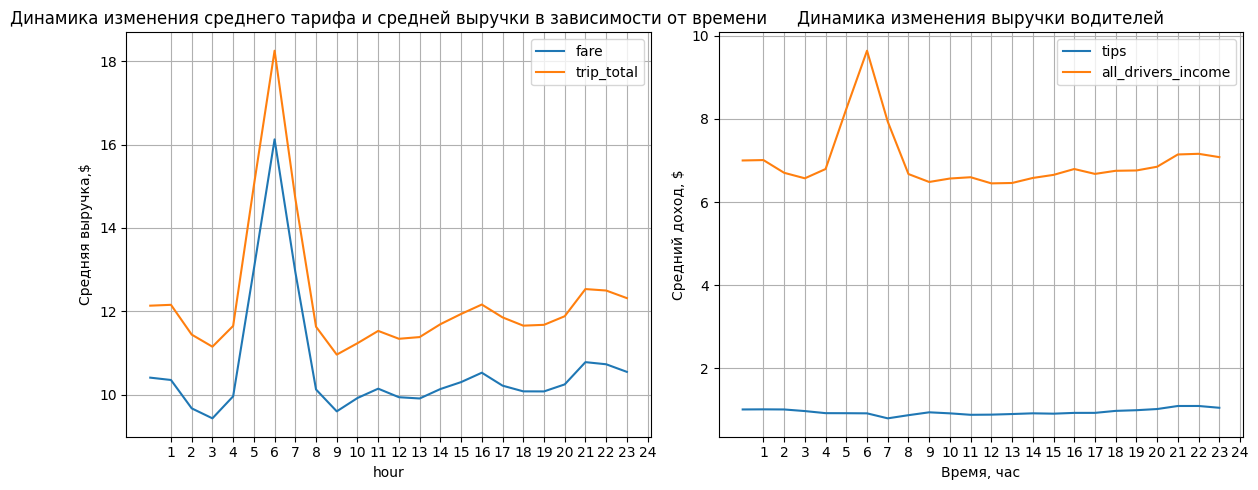

In [59]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
hour_stat = df.pivot_table(index='hour',  values = 'fare', aggfunc='mean')
hour_stat.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средняя выручка,$')
plt.title('Динамика изменения среднего тарифа и средней выручки в зависимости от времени')

ax4 = plt.subplot(1,2,1)
hour_stat = df.pivot_table(index='hour', values = 'trip_total', aggfunc='mean')
hour_stat.plot(grid=True, ax = ax4)

#график 2
ax2 = plt.subplot(1,2,2)
hour_stat = df.pivot_table(index='hour', values = 'tips', aggfunc='mean')
hour_stat.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средний уровень чаевых,$')
plt.title('Динамика изменения средних чаевых по времени')

ax3 = plt.subplot(1,2,2)
hour_stat = df.pivot_table(index='hour', values = 'all_drivers_income', aggfunc='mean')
hour_stat.plot(grid=True, ax = ax3)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Средний доход, $')
plt.title('Динамика изменения выручки водителей')


ax3.xaxis.set_ticks(np.arange(1, 25))
ax1.xaxis.set_ticks(np.arange(1, 25))

plt.tight_layout()
plt.show()

На левом графике представлены Тарифы "средние", посчитанные по данному часу. На правом графике представлен доход водителя (60% от тарифа + все чаевые) и просто чаевые, в зависимости от часа.


---



**Вывод:**
1. Самый высокий средний тариф наблюдается с 4 часов утра и до 6 утра (до 16 долларов).

2. Самый низкий средний тариф наблюдается с 2 часов до 4 часов утра включительно, составляет приблизительно 8 долларов, а так же в промежутке с 8 до 10 утра (около 10 долларов).

3. С повышением Тарифа общая выручка водителя так же повышается.

4. С 6 до 9 утра Водители полуют самые маленькие чаевые.

5. Самые высокие чаевые водители получают в период с 20 до 23 часов вечера (0,45 долларов приблизительно).

In [60]:
#определяем периоды где Тарифы "ниже среднего"
below_avg_periods = hourly_stats[(hourly_stats['fare'] < hourly_stats['fare'].mean())] #& (hourly_stats['tips'] < hourly_stats['tips'].mean()) & (hourly_stats['trip_total'] < hourly_stats['trip_total'].mean()) & (hourly_stats['all_drivers_income'] < hourly_stats['all_drivers_income'].mean())].index
display(below_avg_periods)

,fare,tips,all_drivers_income,trip_total
hour,,,,
0,10.41,1.01,7.00,12.13
1,10.35,1.02,7.01,12.15
2,9.67,1.01,6.71,11.44
3,9.43,0.98,6.57,11.15
4,9.96,0.93,6.80,11.65
8,10.12,0.88,6.68,11.63
9,9.60,0.95,6.49,10.96
10,9.92,0.92,6.57,11.23
11,10.14,0.89,6.60,11.53


Мы определили часы где тарифы ниже среднего, теперь построим графики для определенного значения тарифов.

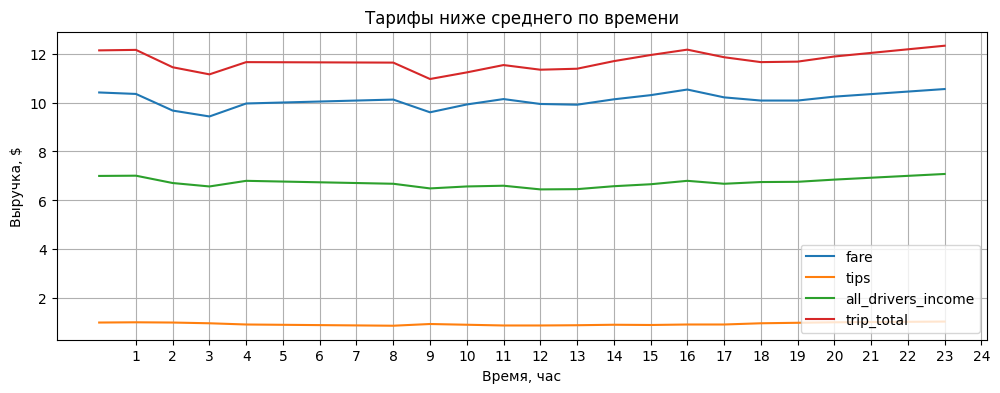

In [61]:
plt.figure(figsize = (12, 4))

ax1 = plt.subplot (1,1,1)
below_avg_periods.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Время, час')
plt.ylabel('Выручка, $')
plt.title('Тарифы ниже среднего по времени')

ax1.xaxis.set_ticks(np.arange(1, 25))
plt.show()

**Вывод:**
1. Тарифы ниже среднего наблюдаются с часа ночи до 4 утра, далее с 8 до 10 утра.

2. Выручка водителей в этот период в среднем составляет: от 6 до 6.5 долларов.

3. Самые низкие чаевые, как мы уже говорили, водители получают  с 9 утра и до 15 дня.

### Изменение в зависимости от недели:

In [62]:
df['week'] = df['trip_start_timestamp'].dt.isocalendar().week
df['week'] #извлечём недели из столбца с датой

0           6
1           7
2          11
3          11
4          11
           ..
1825122    12
1825123    11
1825124    12
1825125    11
1825126    12
Name: week, Length: 1825113, dtype: UInt32

In [63]:
week_stats = df.groupby('week').agg({'fare': 'mean', 'tips': 'mean', 'all_drivers_income':'mean', 'trip_total':'mean'}).round(2) #посмотрим почасовую выручку, определим среднее по часам


display(week_stats)

,fare,tips,all_drivers_income,trip_total
week,,,,
5,9.93,0.92,6.68,11.65
6,10.40,0.93,6.84,11.92
7,10.11,0.95,6.69,11.59
8,10.11,0.91,6.66,11.61
9,10.20,0.94,6.72,11.79
10,10.41,0.99,6.86,12.02
11,10.56,1.01,7.02,12.31
12,10.39,1.00,6.87,12.07
13,10.40,1.00,6.89,12.11


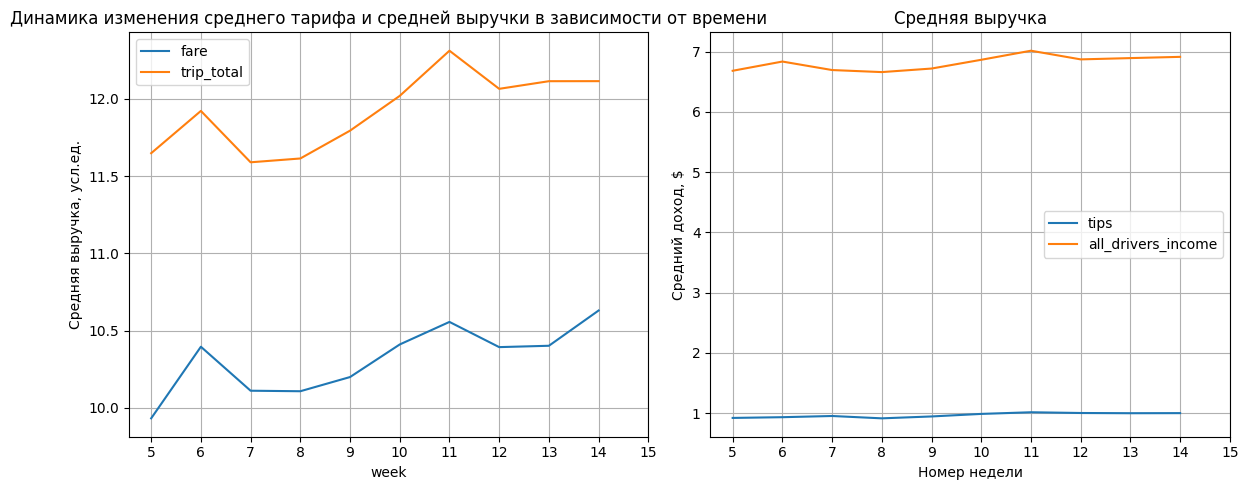

In [64]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
week_stats = df.pivot_table(index='week',  values = 'fare', aggfunc='mean')
week_stats.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Средняя выручка, усл.ед.')
plt.title('Динамика изменения среднего тарифа и средней выручки в зависимости от времени')

ax4 = plt.subplot(1,2,1)
week_stat = df.pivot_table(index='week', values = 'trip_total', aggfunc='mean')
week_stat.plot(grid=True, ax = ax4)

#график 2
ax2 = plt.subplot(1,2,2)
week_stat = df.pivot_table(index='week', values = 'tips', aggfunc='mean')
week_stat.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Средний уровень чаевых, $')
plt.title('Средние чаевые')

ax3 = plt.subplot(1,2,2)
week_stat = df.pivot_table(index='week', values = 'all_drivers_income', aggfunc='mean')
week_stat.plot(grid=True, ax = ax3)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Средний доход, $')
plt.title('Средняя выручка')


ax3.xaxis.set_ticks(np.arange(5, 16))
ax1.xaxis.set_ticks(np.arange(5, 16))

plt.tight_layout()
plt.show()

In [65]:
#определяем периоды где Тарифы "ниже среднего"
week_avg_periods = week_stats[(week_stats['fare'] < week_stats['fare'].mean())] #& (hourly_stats['tips'] < hourly_stats['tips'].mean()) & (hourly_stats['trip_total'] < hourly_stats['trip_total'].mean()) & (hourly_stats['all_drivers_income'] < hourly_stats['all_drivers_income'].mean())].index
display(week_avg_periods)

,fare
week,
5,9.932438
7,10.111213
8,10.107857
9,10.199711


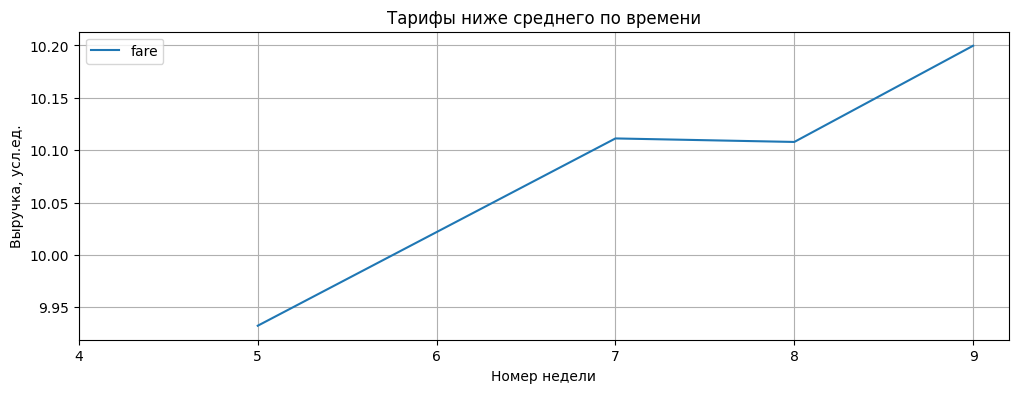

In [66]:
plt.figure(figsize = (12, 4))

ax1 = plt.subplot (1,1,1)
week_avg_periods.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Выручка, усл.ед.')
plt.title('Тарифы ниже среднего по времени')

ax1.xaxis.set_ticks(np.arange(4, 10))
plt.show()

**Вывод:**
1. Тарифы ниже среднего были на с 5 и до 10 недели.
2. При этом общая выручка водителей за этот период соответсвенно была ниже остальных недель.
3. В этот же перид были самые низкие чаевые.
4. Самые низкие чаевые давали на 5,6 неделе.

## Критические периоды дефицита предложения

<a name='c'></a>

In [67]:
df['hour_trip_start'] = df['trip_start_timestamp'].dt.floor('H') #выделим столбец и оставим час начала поездки, чтобы соединить два датасета по одинаковму столбцу

In [68]:
df_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hour Trip Start     1413 non-null   datetime64[ns]
 1   Estimated coverage  1411 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.2 KB


In [69]:
df_cover = df_cover.rename(columns={'Hour Trip Start':'hour_trip_start', 'Estimated coverage':'estimated_coverage'})

In [70]:
merged_df = pd.merge(df, df_cover, on='hour_trip_start', how='inner')

In [71]:
merged_df

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,...,taxi_id,time_nan,time_nan_seconds,trip_start_hour,week,hour,60%_fare,all_drivers_income,hour_trip_start,estimated_coverage
0,2015-02-06 06:45:00,2015-02-06 07:00:00,540.0,2.8,21.0,15.0,8.85,0.00,0.0,0.0,...,250,0 days 00:15:00,900.0,2015-02-06 06:00:00,6,6,5.31,5.31,2015-02-06 06:00:00,0.75
1,2015-02-06 06:45:00,2015-02-06 06:45:00,0.0,0.0,76.0,76.0,3.25,NaN,0.0,0.0,...,117,0 days 00:00:00,0.0,2015-02-06 06:00:00,6,6,1.95,NaN,2015-02-06 06:00:00,0.75
2,2015-02-06 06:45:00,2015-02-06 07:15:00,1320.0,0.0,32.0,56.0,27.85,NaN,0.0,2.0,...,633,0 days 00:30:00,1800.0,2015-02-06 06:00:00,6,6,16.71,NaN,2015-02-06 06:00:00,0.75
3,2015-02-06 06:45:00,2015-02-06 07:00:00,480.0,2.4,27.0,23.0,8.05,0.00,0.0,0.0,...,2043,0 days 00:15:00,900.0,2015-02-06 06:00:00,6,6,4.83,4.83,2015-02-06 06:00:00,0.75
4,2015-02-06 06:45:00,2015-02-06 07:00:00,540.0,0.1,24.0,32.0,9.25,0.00,0.0,0.0,...,480,0 days 00:15:00,900.0,2015-02-06 06:00:00,6,6,5.55,5.55,2015-02-06 06:00:00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825107,2015-03-31 03:30:00,2015-03-31 03:45:00,360.0,0.0,8.0,8.0,6.25,0.00,0.0,0.0,...,495,0 days 00:15:00,900.0,2015-03-31 03:00:00,14,3,3.75,3.75,2015-03-31 03:00:00,0.95
1825108,2015-03-31 03:30:00,2015-03-31 03:30:00,0.0,0.0,NaN,NaN,12.65,2.53,0.0,0.0,...,3105,0 days 00:00:00,0.0,2015-03-31 03:00:00,14,3,7.59,10.12,2015-03-31 03:00:00,0.95
1825109,2015-03-31 03:30:00,2015-03-31 03:45:00,660.0,0.0,6.0,7.0,8.85,0.00,0.0,1.0,...,214,0 days 00:15:00,900.0,2015-03-31 03:00:00,14,3,5.31,5.31,2015-03-31 03:00:00,0.95
1825110,2015-03-31 03:30:00,2015-03-31 03:30:00,0.0,0.0,NaN,NaN,7.45,1.49,0.0,0.0,...,2621,0 days 00:00:00,0.0,2015-03-31 03:00:00,14,3,4.47,5.96,2015-03-31 03:00:00,0.95


In [72]:
grouped_df = merged_df.groupby(['estimated_coverage', 'hour_trip_start']).size().reset_index(name='count')

In [73]:


fig = px.bar(grouped_df, x=['estimated_coverage'], y='count')
fig.update_layout(title='Количество поездок в зависимост от зоны покрытия', xaxis_title='Покрытие (расчётная)', yaxis_title='Количество поездок')
fig.show()

То есть, в основном поездки совершались при покрытии около 0.78.

Посчитаем число уникальных клиентов, исходя из того, что Покрытие рассчитывалось следующим образом: покрытие = (число уникальных клиентов)/количество машин на линии в этот час

In [74]:
merged_df['unic_cl'] = merged_df.groupby('hour_trip_start')['estimated_coverage'].transform('first') * merged_df.groupby('hour_trip_start')['taxi_id'].transform('first')

In [75]:
merged_df.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_community_area', 'dropoff_community_area', 'fare',
       'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'taxi_id',
       'time_nan', 'time_nan_seconds', 'trip_start_hour', 'week', 'hour',
       '60%_fare', 'all_drivers_income', 'hour_trip_start',
       'estimated_coverage', 'unic_cl'],
      dtype='object')

In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825112 entries, 0 to 1825111
Data columns (total 28 columns):
 #   Column                      Dtype          
---  ------                      -----          
 0   trip_start_timestamp        datetime64[ns] 
 1   trip_end_timestamp          datetime64[ns] 
 2   trip_seconds                float64        
 3   trip_miles                  float64        
 4   pickup_community_area       float64        
 5   dropoff_community_area      float64        
 6   fare                        float64        
 7   tips                        float64        
 8   tolls                       float64        
 9   extras                      float64        
 10  trip_total                  float64        
 11  payment_type                category       
 12  company                     category       
 13  pickup_centroid_latitude    float64        
 14  pickup_centroid_longitude   float64        
 15  dropoff_centroid_latitude   float64        
 16  

In [77]:
merged_df.duplicated().sum()

43

In [78]:
merged_df = merged_df.drop_duplicates()

In [79]:
merged_df.head(2)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,...,time_nan,time_nan_seconds,trip_start_hour,week,hour,60%_fare,all_drivers_income,hour_trip_start,estimated_coverage,unic_cl
0,2015-02-06 06:45:00,2015-02-06 07:00:00,540.0,2.8,21.0,15.0,8.85,0.0,0.0,0.0,...,0 days 00:15:00,900.0,2015-02-06 06:00:00,6,6,5.31,5.31,2015-02-06 06:00:00,0.75,187.5
1,2015-02-06 06:45:00,2015-02-06 06:45:00,0.0,0.0,76.0,76.0,3.25,NaN,0.0,0.0,...,0 days 00:00:00,0.0,2015-02-06 06:00:00,6,6,1.95,NaN,2015-02-06 06:00:00,0.75,187.5


In [80]:
client = merged_df.groupby('hour')['unic_cl'].agg('mean').reset_index()
client.round(0)

,hour,unic_cl
0,0,753.0
1,1,847.0
2,2,729.0
3,3,727.0
4,4,495.0
5,5,701.0
6,6,745.0
7,7,817.0
8,8,991.0
9,9,887.0


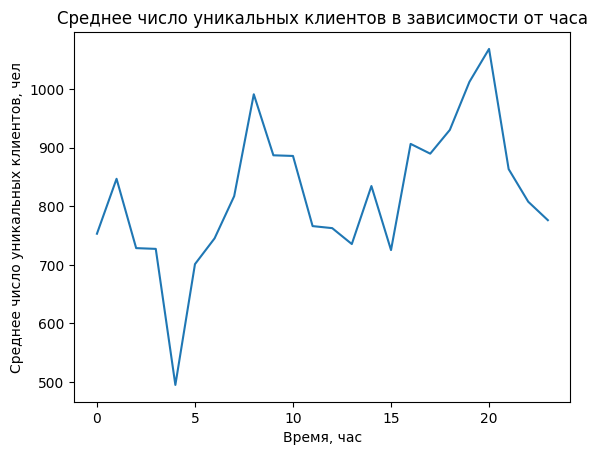

In [81]:
plt.plot(client['hour'], client['unic_cl'])

plt.xlabel('Время, час')
plt.ylabel('Среднее число уникальных клиентов, чел')
plt.title('Среднее число уникальных клиентов в зависимости от часа')

plt.show()

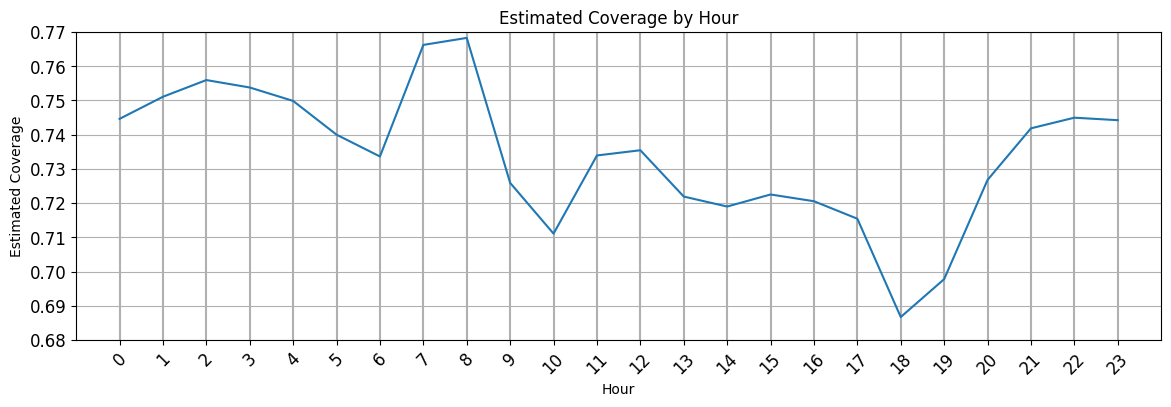

In [82]:
line  = merged_df.groupby('hour')['estimated_coverage'].agg('mean').plot(grid=True, figsize=(14,4))
line.set_xlabel('Hour')
line.set_ylabel('Estimated Coverage')
line.set_title('Estimated Coverage by Hour')
line.tick_params(axis='both', which='major', labelsize=12)
line.tick_params(axis='both', which='minor', labelsize=10)

line.set(xticks=range(0, 24, 1))
line.set_xlim([-1, 24])
line.set_ylim([0.68, 0.77])

line.set_xticklabels(line.get_xticks(), rotation=45)
line.xaxis.grid(True, which='major', linewidth=1.5)

Мы видим, что рассчитанная величина уровня покрытия проседает например в 18 часов, хотя количество заказов в этот час увеличивается. Нужно посмотреть, что происходило с количеством машин на линии в эти часы:
_______________


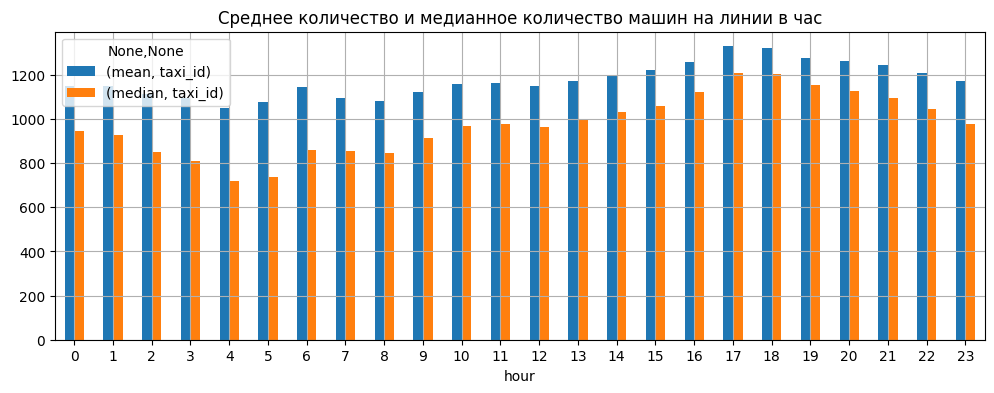

In [83]:
hourly_stats = df.pivot_table(values='taxi_id', index='hour', aggfunc=['mean', 'median']).plot(kind='bar',
                                                                                rot=0,
                                                                                grid=True,
                                                                                figsize=(12,4),
                                                                                title = 'Среднее количество и медианное количество машин на линии в час')

In [84]:
hourly_stats_car = df.groupby('hour')['taxi_id'].agg(['mean', 'median']).sort_values('mean').round(1)
hourly_stats_car

,mean,median
hour,,
4,1048.1,720.0
5,1078.1,736.0
8,1084.1,846.0
3,1094.5,808.0
7,1095.1,856.0
2,1114.0,850.0
9,1120.9,914.0
6,1143.6,861.0
12,1150.7,964.0


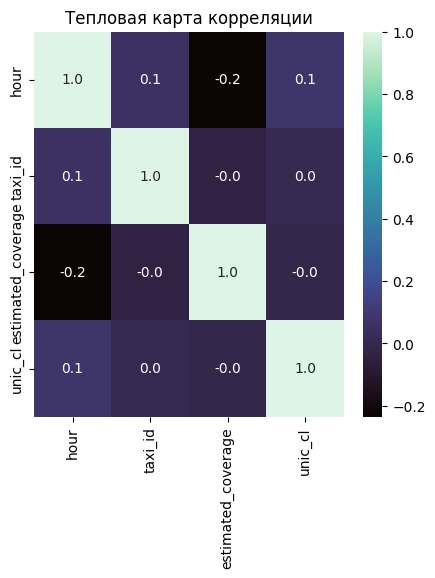

In [85]:
plt.figure(figsize=(5,5))
sns.heatmap(merged_df[['hour', 'taxi_id', 'estimated_coverage', 'unic_cl']].corr(), annot=True, cmap='mako', fmt='.1f')
plt.title('Тепловая карта корреляции')
plt.show()


Достоверной корреляции между часом и уровнем покрытия нет, хотя есть отрицательно обратный тренд их зависимости. То есть чем больше час, тем меньше зона покрытия. Но и этот тренд не достоверный.

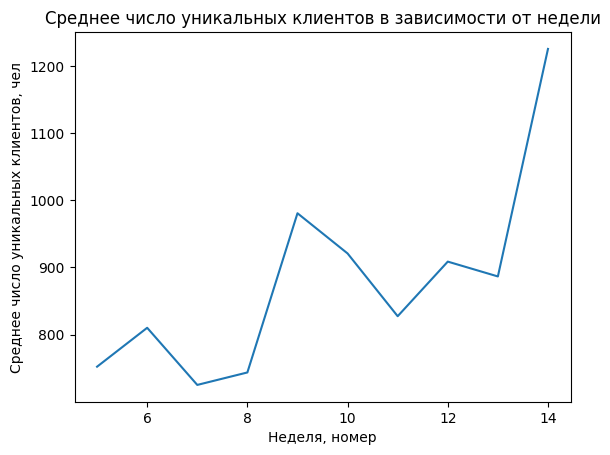

,week,unic_cl
0,5,752.4
1,6,810.3
2,7,725.3
3,8,743.8
4,9,980.6
5,10,920.8
6,11,827.5
7,12,908.7
8,13,886.6
9,14,1225.1


In [86]:
client_w = merged_df.groupby('week')['unic_cl'].agg('mean').reset_index()
client_w.round(0)

plt.plot(client_w['week'], client_w['unic_cl'])

plt.xlabel('Неделя, номер')
plt.ylabel('Среднее число уникальных клиентов, чел')
plt.title('Среднее число уникальных клиентов в зависимости от недели')

plt.show()
display(client_w.round(1))

Наибольшее число уникальных клиентов наблюдалось на c 4 по 9 недели

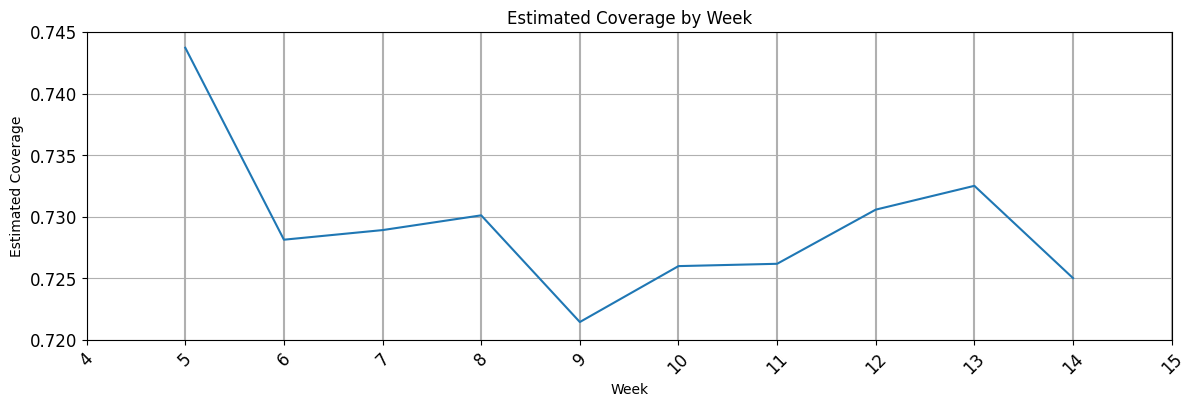

In [87]:
line  = merged_df.groupby('week')['estimated_coverage'].agg('mean').plot(grid=True, figsize=(14,4))
line.set_xlabel('Week')
line.set_ylabel('Estimated Coverage')
line.set_title('Estimated Coverage by Week')
line.tick_params(axis='both', which='major', labelsize=12)
line.tick_params(axis='both', which='minor', labelsize=10)

line.set(xticks=range(0, 24, 1))
line.set_xlim([4, 15])
line.set_ylim([0.72, 0.745])

line.set_xticklabels(line.get_xticks(), rotation=45)
line.xaxis.grid(True, which='major', linewidth=1.5)

Наихудшие показатели по уровню покрытия, соответственно, наблюдалис с 6 по 13 неделю. Машин было много - спрос был меньше.

In [88]:
line = merged_df.pivot_table(index='week',
                       values='taxi_id',
                       aggfunc=['mean']).reset_index()
display(line.round(1))


,week,mean
,,taxi_id
0,5,1211.7
1,6,1213.2
2,7,1174.6
3,8,1175.5
4,9,1193.7
5,10,1191.8
6,11,1224.0
7,12,1229.4
8,13,1220.7


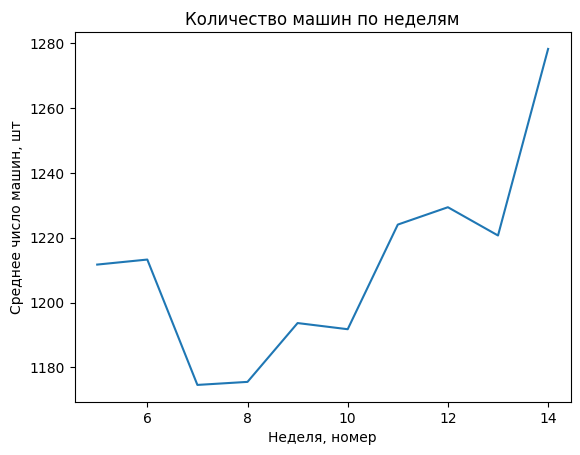

In [89]:

plt.plot(line['week'], line['mean'])

plt.xlabel('Неделя, номер')
plt.ylabel('Среднее число машин, шт')
plt.title('Количество машин по неделям')

plt.show()

Количество машин по неделям примерно равняется количеству клиентов.

1. Мы наблюдаем, что покрытие в 17-18-19 часов падает! Хотя, количество клиентов растет и даже растет количество машин. Значит, рост клиентуры превышает предложние (спрос превысил предложение), машин на линии не хватает. Вероятно, стоит рассмотреть возможность повышения количества машин на линии.

2. Одновременно с этим, мы видим что в 6-7-8 утра величина покрытия самая высокая, при неизменном уровне количеств машин. Количество же клиентов в этот момент проседает. - можно сказать что количество машин в этот момент на линии - адекватно.

3. в 10 часов утра наблюдается увеличение числа клиентов, без увеличения числа машин - это критический час, число машин можно увеличить.

## Периоды, в которые меры стимулирования предложения услуг такси нужны и будут наиболее эффективны

<a name='p'></a>

In [90]:
merged_df['day_week'] = merged_df['trip_start_timestamp'].dt.weekday + 1
merged_df['day_week'].unique()

<ipython-input-90-cfb14ef0e792>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([5, 3, 7, 2, 4, 6, 1])

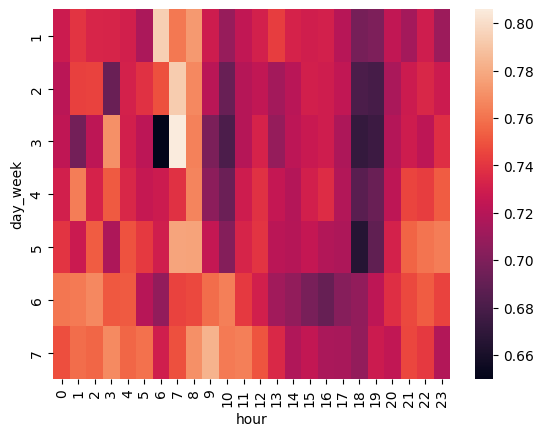

In [91]:
sns.heatmap(pd.pivot_table(data=merged_df, index='day_week', columns='hour', values='estimated_coverage', aggfunc='mean'));

1. Мы видим, что покрытие самое лучшее по воскресеньям, с 0 до 5 утра, а так же с 8 до 12 дня.  В этот день стимулироват таксистов не требуется.
2. Зато  в будние дни с пнедельника по пятницу с 18 до 19 покрытие какое-то маленькое. Нужно увеличить количество машин.
3. В будни с 7 и до 8 покрытие максимальное, количество машин на линии адекватно.
4. В среднем, можно увеличить количество машин на линии и в субботу и в воскресенье с 12 до 4 утра.
5. Уменьшить количество машин на линии с 12 дня до 19 вечера по будням и выходным.

## Объём недополученной общей выручки из-за низкого предложения дефицит количества машин на линии
<a name='m'></a>

-сколько нужно вывести машин дополнительно, чтобы достичь нормального покрытия

Попробуем рассуждать логически: мы знаем уровень покрытия. Уровень покрытия рассчитывается из: количество уникальных клиентов/количество машин в заданный период времени.

мы знаем уровень покрытия в определенный час. в этот же час мы можем посчитать количество машин. от сюда мы можем рассчитать количество клиентов.

клиентов считаем так: уровень покрытия * на количество машин

далее, мы можем принять для себя правило: уровень покрытия должен составлять 0.78 в каждый час. (например). От сюда мы можем, зная количество клиентов в этот час - рассчитать. сколько реально машин нужно было выпустить в этот час.

Рассчитываться это будет следующим образом:
нужное количество машин = количество клиентов/уровень покрытия(0.78).

Далее:
из реального количества машин в этот час - отнимаем нужное количество машин в этот час: имеем количество недостающих машин в этот час.

In [92]:
num_cars = merged_df.groupby(['hour', 'day_week', 'week']).agg({'taxi_id':'mean', 'estimated_coverage':'mean', 'fare':'mean'}).reset_index().round(2)
num_cars

,hour,day_week,week,taxi_id,estimated_coverage,fare
0,0,1,6,1358.51,0.66,10.17
1,0,1,7,1196.30,0.72,13.27
2,0,1,8,1320.67,1.00,18.83
3,0,1,9,1105.89,0.74,11.97
4,0,1,10,1131.46,0.73,13.53
...,...,...,...,...,...,...
1404,23,7,9,1113.08,0.78,12.67
1405,23,7,10,1198.47,0.74,11.72
1406,23,7,11,1169.54,0.70,12.76
1407,23,7,12,1200.06,0.70,12.67


In [93]:
num_cars['clients'] = (num_cars['estimated_coverage'] * num_cars['taxi_id']).round(0)#рассчет количества клиентов

display(num_cars)

,hour,day_week,week,taxi_id,estimated_coverage,fare,clients
0,0,1,6,1358.51,0.66,10.17,897.0
1,0,1,7,1196.30,0.72,13.27,861.0
2,0,1,8,1320.67,1.00,18.83,1321.0
3,0,1,9,1105.89,0.74,11.97,818.0
4,0,1,10,1131.46,0.73,13.53,826.0
...,...,...,...,...,...,...,...
1404,23,7,9,1113.08,0.78,12.67,868.0
1405,23,7,10,1198.47,0.74,11.72,887.0
1406,23,7,11,1169.54,0.70,12.76,819.0
1407,23,7,12,1200.06,0.70,12.67,840.0


In [94]:
num_cars['ideal'] = (num_cars['clients']/0.78).round(0)#нашли, сколько машин должно быть в ИДЕАЛЬНЫХ УСЛОВИЯХ
num_cars['shortage_cars'] = num_cars['taxi_id'] - num_cars['ideal']# нашли, сколько машин в час не хватает (из того, что есть вычли идеал)
#теперь рассчитаем надостаток выручки с часа:
#общую выручку в час, поделим на количество машин такси-айди, а потом умножим на недостаток машин в час
num_cars['shortage_revenue'] = ((num_cars['fare']/num_cars['taxi_id'])*num_cars['shortage_cars']).round(1)
display(num_cars.clip(lower=0))

,hour,day_week,week,taxi_id,estimated_coverage,fare,clients,ideal,shortage_cars,shortage_revenue
0,0,1,6,1358.51,0.66,10.17,897.0,1150.0,208.51,1.6
1,0,1,7,1196.30,0.72,13.27,861.0,1104.0,92.30,1.0
2,0,1,8,1320.67,1.00,18.83,1321.0,1694.0,0.00,0.0
3,0,1,9,1105.89,0.74,11.97,818.0,1049.0,56.89,0.6
4,0,1,10,1131.46,0.73,13.53,826.0,1059.0,72.46,0.9
...,...,...,...,...,...,...,...,...,...,...
1404,23,7,9,1113.08,0.78,12.67,868.0,1113.0,0.08,0.0
1405,23,7,10,1198.47,0.74,11.72,887.0,1137.0,61.47,0.6
1406,23,7,11,1169.54,0.70,12.76,819.0,1050.0,119.54,1.3
1407,23,7,12,1200.06,0.70,12.67,840.0,1077.0,123.06,1.3


In [95]:
num_cars.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
hour,1409.0,11.53939,6.918872,0.0,6.0,12.0,18.0,23.0
day_week,1409.0,3.969482,2.043853,1.0,2.0,4.0,6.0,7.0
week,1409.0,9.577715,2.448872,5.0,7.0,10.0,12.0,14.0
taxi_id,1409.0,1165.246998,156.527678,244.0,1099.43,1176.15,1246.08,2865.0
estimated_coverage,1408.0,0.731768,0.07458,0.0,0.71,0.73,0.76,1.0
fare,1409.0,10.975955,2.183681,3.79,9.74,10.35,11.44,29.65
clients,1408.0,850.581676,136.011932,0.0,806.0,863.0,910.0,2865.0
ideal,1408.0,1090.490057,174.383006,0.0,1033.0,1106.0,1167.0,3673.0
shortage_cars,1408.0,74.17331,118.466685,-808.0,30.7125,75.555,111.5975,1983.0
shortage_revenue,1408.0,0.669105,1.324453,-8.4,0.3,0.7,1.0,21.1


В среднем, общее количество машин на линии составляло 1165 машин, среднее количество клиентов на линии составляло 850 клиента. В среднем, идеальное количество машин на линии около 1090 штук. В среднем, недостаток около 74 машин в час, общая потеря выручки составляет 44 доллара в час. Среднее значение покрытия 0.73, при идеальном 0.78 (максимально наблюдаемое нами выше в реальном фрейме данных). Идеализированное покрытие составляет 1. То есть количество запросов уникальных клиентов и количество машин на линии одинаково. Но это почти нереально.
________________
Визуализируем

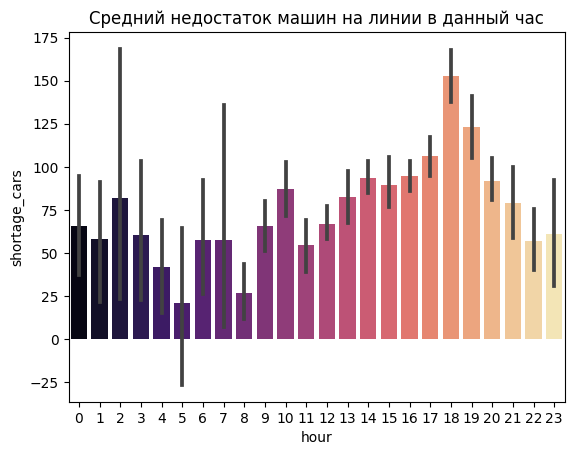

In [96]:
sns.barplot(data=num_cars,
            x="hour",
            y="shortage_cars",

            palette="magma"
           )
plt.title("Средний недостаток машин на линии в данный час", fontsize = 12);

То есть, максимальный недостаток машин мы наблюдаем в 18 и 19 часов.
Минимальный недостаток машин наблюдается с 12 ночи и до 8 утра включительно. Далее он возрастает.
1. Не хватает в 18 и 19 часов вечера до 250 машин.
2. С 9 утра до 17 часов не хватает около 120 машин.
3. С 20 и до 24 не хватает около 50 машин в час.
4. Самое адекватное количество машин на линии в 4 и 5 утра.

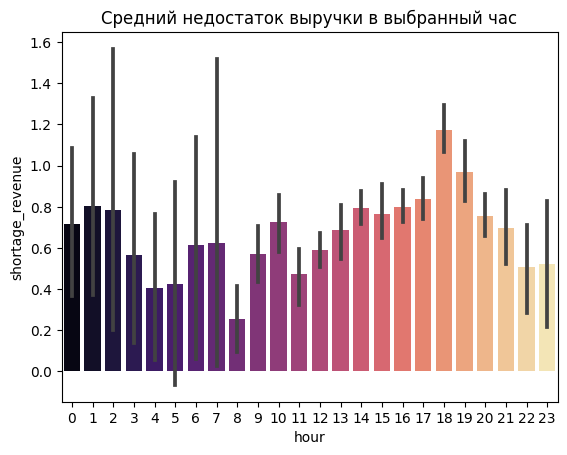

In [97]:
sns.barplot(data=num_cars,
            x="hour",
            y="shortage_revenue",

            palette="magma"
           )
plt.title("Средний недостаток выручки в выбранный час", fontsize = 12);

Так как недостаток машин напрямую связан с недостатком выручки, мы видим похожу картину: максимально компания недопулчает выручку в 18 и 19 часов вечера. Самая адекваная картина представлена с 3 утра  12 дня.

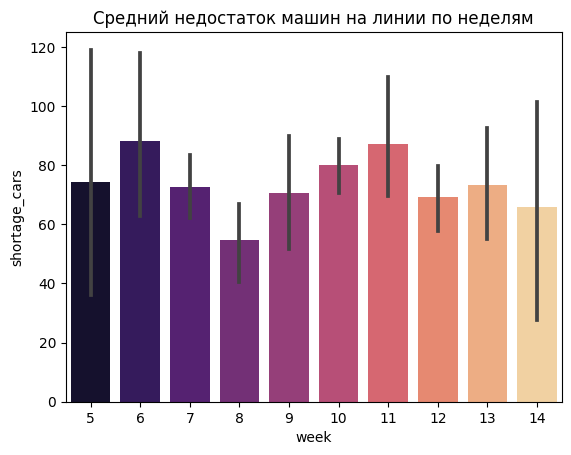

In [98]:
sns.barplot(data=num_cars,
            x="week",
            y="shortage_cars",

            palette="magma"
           )
plt.title("Средний недостаток машин на линии по неделям", fontsize = 12);

наибольшая нехватка машин наблюдалась на 6, 11 неделях, а так же на 10 и 5.


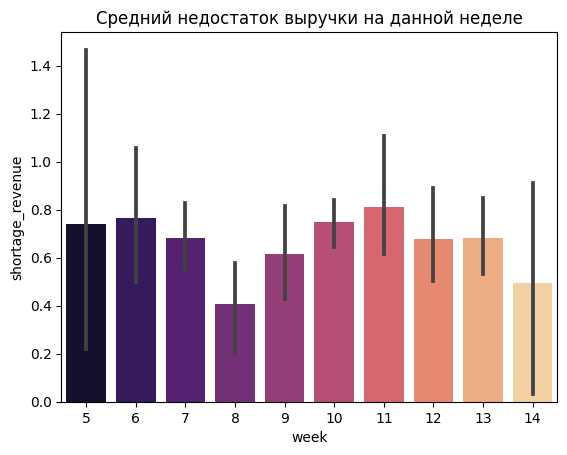

In [99]:
sns.barplot(data=num_cars,
            x="week",
            y="shortage_revenue",

            palette="magma"
           )
plt.title("Средний недостаток выручки на данной неделе", fontsize = 12);

Наибольший надостаток выручки мы видим на 5,6 и 10 и 11 неделях, а так же 12-13-7 неделях.

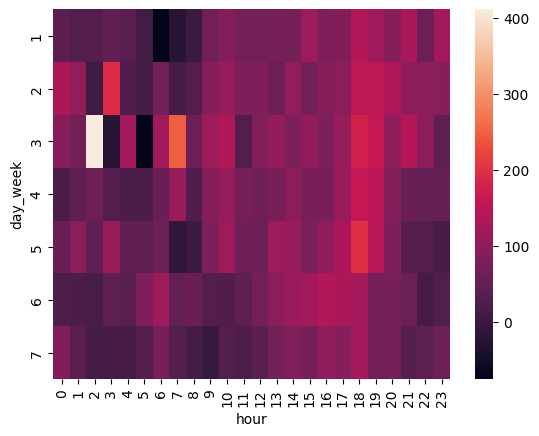

In [100]:
sns.heatmap(pd.pivot_table(data=num_cars, index='day_week', columns='hour', values='shortage_cars', aggfunc='mean'));

1. Самый высокий недостаток машин на линии мы наблюдаем вечером после работы в 18 и 19 часов по будням (пятница самая яркая)
2. Высокий уровень недостатка машин наблюдается в 2 часа ночи в среду, в 8 утра в среду, и самое адекватное количество машин в среду в 4 и 6 утра.
3. В целом к вечеру покрытие явно снижается, а по ночам оно более адекватное, во все дни недели.
4. Стоит обратить внимание на количество машин на линии по вторникам и средам в ночные часы. Там самые яркие показатели.

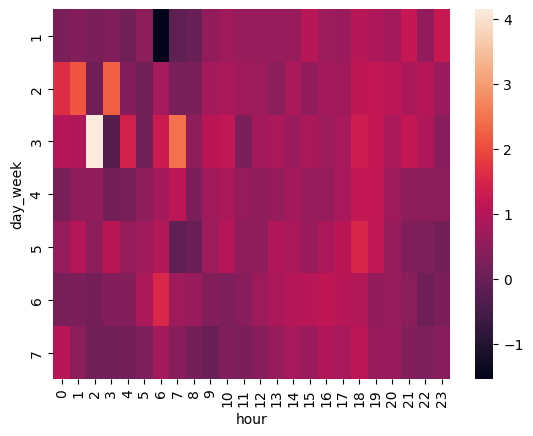

In [101]:
sns.heatmap(pd.pivot_table(data=num_cars, index='day_week', columns='hour', values='shortage_revenue', aggfunc='mean'));

Как говорилось выше - стоит обратить внимание на вторники и среду - ночь. Высокий уровень недополученной выручки. Та же картина по вечерам в будни.

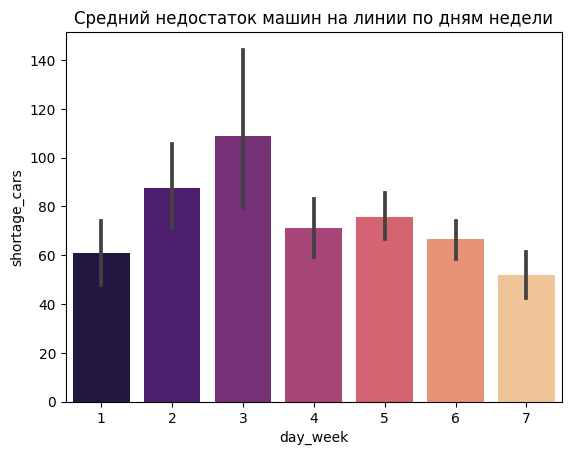

In [102]:
sns.barplot(data=num_cars,
            x="day_week",
            y="shortage_cars",

            palette="magma"
           )
plt.title("Средний недостаток машин на линии по дням недели", fontsize = 12);

1. ПО вторникам и средам можно увеличивать количество машин примерно на 90 штук.
2. В остальные дни приблизительно до 60 машин.

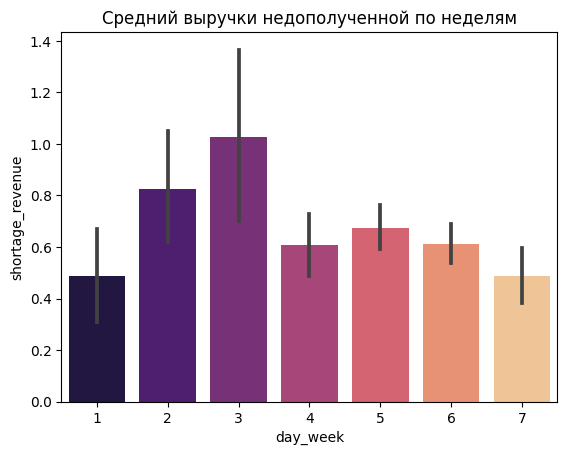

In [103]:
sns.barplot(data=num_cars,
            x="day_week",
            y="shortage_revenue",

            palette="magma"
           )
plt.title("Средний выручки недополученной по неделям", fontsize = 12);

Если бы машин было адекватно спросу, то компания бы не потеряла:
1. до 500 усл.ед. со среды до субботы включительно, в день.
2. до 300 усл. ед. в понедельник, вторник, воскресенье, в день.


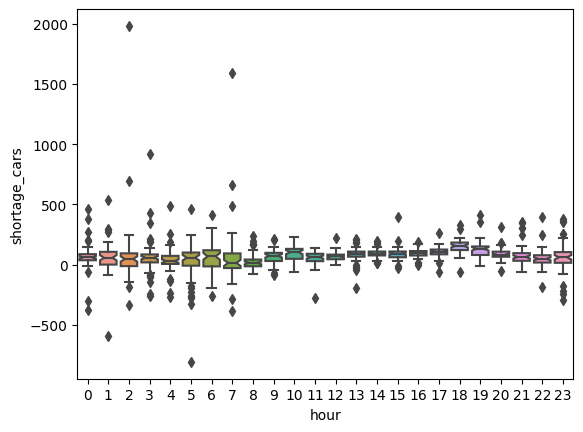

In [104]:
# Построим ещё боксплоты с зазубринами
sns.boxplot(x='hour', y='shortage_cars', data=num_cars, notch=True)

plt.show()

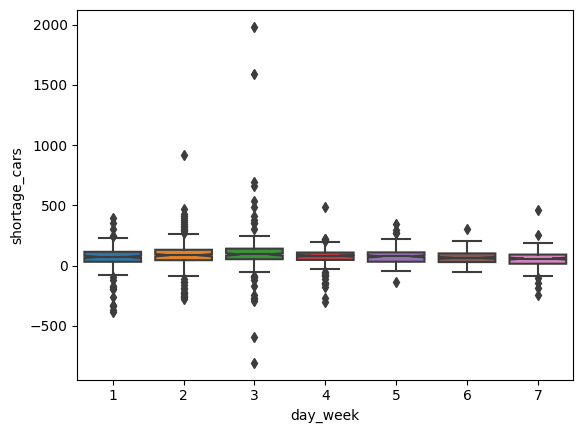

In [105]:
sns.boxplot(x='day_week', y='shortage_cars', data=num_cars, notch=True)

plt.show()

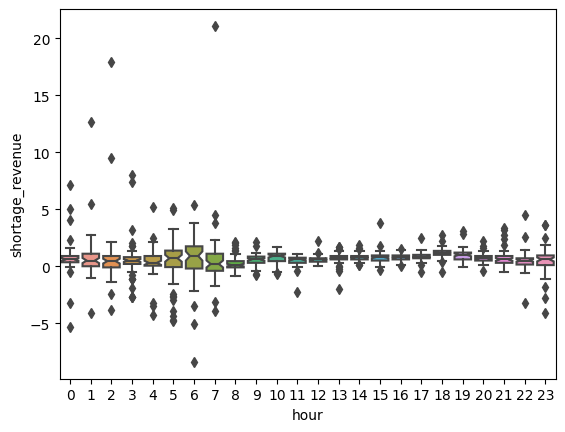

In [106]:
sns.boxplot(x='hour', y='shortage_revenue', data=num_cars, notch=True)

plt.show()

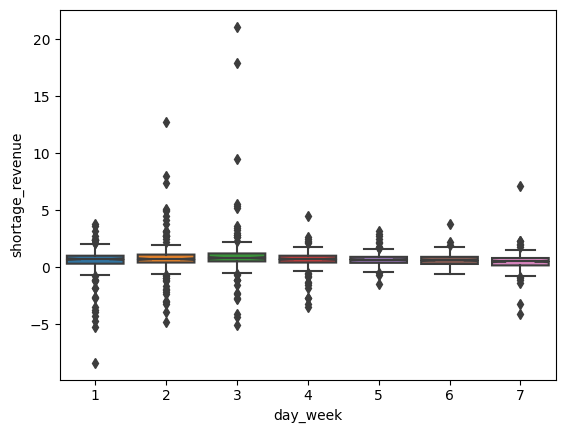

In [107]:
sns.boxplot(x='day_week', y='shortage_revenue', data=num_cars, notch=True)

plt.show()

В общем то, боксплоты с доверительны интервалом (зазубрина), подтвердили ранее представленные нами выводы.

## Меры стимулирования предложения
<a name='mer'></a>

1. Для увеличения количества машин на линии в критические периоды (6 утра, 18-19 вечера, вторник и среда) - в эти дни можно предложить компании агрегатору увеличить тариф в эти пиковые наплывы клиентов. С увеличением тарифа - выручка водителя так же будет увеличина.
2. Мы выяснили, что на данный момент - ситуация координально зеркальная, в эти критические периоды наблюдается самая низкая тарифная стоимость. Поэтому, если мы хотим стимулировать предложение от таксистов - они должны получать прямую выгоду.
3. Можно не увеличивать стоимость тарифа, а, например, увеличить доход таксиста с поездки (не 60% процентов, а, например, 70% + чаевые).
4. В приложении, в котором происходит заказ такси предложить заплатить чаевые, но не ниже, например 1 усл.ед. в критический период. Для того, чтобы, опять же, увеличить выгоду таксиста в этот промежуток времени и простимулировать его выйти на линию.

# Презентация
<a name='prez'></a>

https://disk.yandex.ru/i/IMD1ryRcL4X6jg